1. Write a python program which searches all the product under a particular product from www.amazon.in. The
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for
guitars.
2. In the above question, now scrape the following details of each product listed in first 3 pages of your search
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then
scrape all the products available under that product name. Details to be scraped are: "Brand
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [2]:
# Importing all the necessary libraries to scrape the data from the webpage>
import selenium 
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import warnings
warnings.filterwarnings("ignore")
import time
from bs4 import BeautifulSoup
import requests

In [3]:
# Opening an automated window to scrape data. 
driver = webdriver.Chrome()
driver.get("https://www.amazon.in/")

In [4]:
prod_input = input("Enter product name here please: ")

Enter product name here please: Earphones


In [5]:
# Finding the element and scraping the search bar and search button.
search_bar = driver.find_element(By.ID,"twotabsearchtextbox")
search_bar.send_keys(prod_input)
search_button = driver.find_element(By.ID,"nav-search-submit-button")
search_button.click()

In [6]:
# Creating an empty list to store the details of the product.
product_name = []

In [7]:
# Creating a for loop to scrape the data we need which will loop through all the elements that we need.
p_name = driver.find_elements(By.XPATH,'//div[@class="a-section"]')
for i in p_name:
    if i.text is None:
        product_name.append("--")
    else:
        product_name.append(i.text)
        
print(len(product_name),product_name)

25 ['', 'Sponsored\nbeatXP Tune XPods Bluetooth True Wireless Ear Buds with 50H Playtime, Quad Mic ENC Tech, Low Latency, Type C Earphone with 10mm Drivers, IPX5 Water Resistance, BT 5.3, Touch Control (Black)\n351\n+2 colors/patterns', 'Sponsored\nNu Republic Transform-X Earphone, Earbuds Bluetooth Wireless with X-Bass, ENC Technology, 60 Hrs Playtime, TWS with Mic and Hall Sensor, Fast Charge, Dual Mode - Yellow\n15\n+1 colors/patterns', 'Best seller\nboAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)\n393,985\n+4', 'JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)\n203,773', "Amazon's Choice\nboAt bassheads 105 Wired in Ear Earphones with Mic (Green)\n31,534", 'OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Drivers, 10 Mins Charge - 20 Hrs Music, 30 Hrs Battery Life (Magico Black)\n141,556\n10K+ bought in past month', 'ZEBRONICS Zeb-Bro in Ear Wi

In [61]:
# Creating a for loop to scrape the urls we need which will loop through all the elements that we need.
urls_pg1 = []
url = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-no-outline"]')
for i in url:
    urls_pg1.append(i.get_attribute('href'))
    
print(urls_pg1)

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo1NjMyMjgxNTg1Nzg2NzA0OjE3MDE4NTc4MTA6c3BfYXRmX25leHQ6MzAwMDE2MzEwMzUyMTMyOjowOjo&url=%2FBluetooth-Wireless-Neckband-Playtime-Assistant%2Fdp%2FB0BFFGR76N%2Fref%3Dsr_1_33_sspa%3Fkeywords%3DEarphones%26qid%3D1701857810%26sr%3D8-33-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1', 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo1NjMyMjgxNTg1Nzg2NzA0OjE3MDE4NTc4MTA6c3BfYXRmX25leHQ6MzAwMDE2Mjc1OTA3NDMyOjowOjo&url=%2FNB119-Bluetooth-Wireless-Neckband-Assistant%2Fdp%2FB0BGYJHNY8%2Fref%3Dsr_1_34_sspa%3Fkeywords%3DEarphones%26qid%3D1701857810%26sr%3D8-34-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1', 'https://www.amazon.in/Pride-Indie-Earphones-Cancellation-Tange-Free/dp/B0BCWSM4XD/ref=sr_1_35?keywords=Earphones&qid=1701857810&sr=8-35', 'https://www.amazon.in/Zebronics-Zeb-Corolla-Wired-Earphone-Mic/dp/B07W47WV3T/ref=sr_1_36?keywords=Earphones&qid=1701857810&sr=8-36', 'https://www.amazon.in/Ambrane-BoostedBassTM-Multi-Func

In [9]:
# Creating an empty list to store the details and creating a for loop to scrape the data we need which will loop through all the elements that we need.
prod_name_pg1 = []
start = 0
end = 3
for page in range(start,end):
    titles = driver.find_elements(By.XPATH,'//span[@class="a-size-medium a-color-base a-text-normal"]')
    for i in titles:
        if i.text is None:
            prod_name_pg1.append("--")
        else:
            prod_name_pg1.append(i.text)
            
print(prod_name_pg1)

['beatXP Tune XPods Bluetooth True Wireless Ear Buds with 50H Playtime, Quad Mic ENC Tech, Low Latency, Type C Earphone with 10mm Drivers, IPX5 Water Resistance, BT 5.3, Touch Control (Black)', 'Nu Republic Transform-X Earphone, Earbuds Bluetooth Wireless with X-Bass, ENC Technology, 60 Hrs Playtime, TWS with Mic and Hall Sensor, Fast Charge, Dual Mode - Yellow', 'boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)', 'JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)', 'boAt bassheads 105 Wired in Ear Earphones with Mic (Green)', 'OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Drivers, 10 Mins Charge - 20 Hrs Music, 30 Hrs Battery Life (Magico Black)', 'ZEBRONICS Zeb-Bro in Ear Wired Earphones with Mic, 3.5mm Audio Jack, 10mm Drivers, Phone/Tablet Compatible(Green)', 'realme Buds 2 Wired in Ear Earphones with Mic (Blue)', 'Philips Audio TAE1126 Wired 

In [10]:
# Creating an empty list to store the details and creating a for loop to scrape the data we need which will loop through all the elements that we need.
price_pg1 = []
for page in range(start,end):
    tag1 = driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
    for i in tag1:
        if i.text is None:
            price_pg1.append("--")
        else:
            price_pg1.append(i.text)
price_pg1

['3,299',
 '3,299',
 '499',
 '487',
 '1,499',
 '999',
 '',
 '',
 '3,299',
 '3,299',
 '499',
 '487',
 '1,499',
 '999',
 '',
 '',
 '3,299',
 '3,299',
 '499',
 '487',
 '1,499',
 '999',
 '',
 '']

In [11]:
# Creating an empty list to store the details and creating a for loop to scrape the data we need which will loop through all the elements that we need.
ratings_pg1 = []
for page in range(start,end):
    tag2 = driver.find_elements(By.XPATH,'//span[@class="a-size-base s-underline-text"]')
    for i in tag2:
        if i.text is None:
            ratings_pg1.append("--")
        else:
            ratings_pg1.append(i.text)
            
print(ratings_pg1)

['351', '15', '393,985', '203,773', '31,534', '951', '298', '18,493', '', '', '141,556', '42,151', '164,558', '35,972', '6,895', '1,978', '225,046', '5,350', '42,151', '35,972', '176,212', '78,621', '66,188', '92,357', '61,692', '92,357', '1,828', '57,001', '298', '11,970', '4', '', '', '351', '15', '393,985', '203,773', '31,534', '951', '298', '18,493', '', '', '141,556', '42,151', '164,558', '35,972', '6,895', '1,978', '225,046', '5,350', '42,151', '35,972', '176,212', '78,621', '66,188', '92,357', '61,692', '92,357', '1,828', '57,001', '298', '11,970', '4', '', '', '351', '15', '393,985', '203,773', '31,534', '951', '298', '18,493', '', '', '141,556', '42,151', '164,558', '35,972', '6,895', '1,978', '225,046', '5,350', '42,151', '35,972', '176,212', '78,621', '66,188', '92,357', '61,692', '92,357', '1,828', '57,001', '298', '11,970', '4', '', '']


In [12]:
# Creating an empty list to store the details and creating a for loop to scrape the data we need which will loop through all the elements that we need.
exptd_delivery = []
for page in range(start,end):
    tag3 = driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')
    for x in tag3:
        if x.text is None:
            exptd_delivery.append("--")
        else:
            exptd_delivery.append(x.text)
            
exptd_delivery

['Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December']

In [13]:
next_button = driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[31]/div/div/span/a[3]')
next_button.click()

In [62]:
urls_pg2 = []
url = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-no-outline"]')
for i in url:
    urls_pg2.append(i.get_attribute('href'))
    
print(urls_pg2)

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo1NjMyMjgxNTg1Nzg2NzA0OjE3MDE4NTc4MTA6c3BfYXRmX25leHQ6MzAwMDE2MzEwMzUyMTMyOjowOjo&url=%2FBluetooth-Wireless-Neckband-Playtime-Assistant%2Fdp%2FB0BFFGR76N%2Fref%3Dsr_1_33_sspa%3Fkeywords%3DEarphones%26qid%3D1701857810%26sr%3D8-33-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1', 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo1NjMyMjgxNTg1Nzg2NzA0OjE3MDE4NTc4MTA6c3BfYXRmX25leHQ6MzAwMDE2Mjc1OTA3NDMyOjowOjo&url=%2FNB119-Bluetooth-Wireless-Neckband-Assistant%2Fdp%2FB0BGYJHNY8%2Fref%3Dsr_1_34_sspa%3Fkeywords%3DEarphones%26qid%3D1701857810%26sr%3D8-34-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1', 'https://www.amazon.in/Pride-Indie-Earphones-Cancellation-Tange-Free/dp/B0BCWSM4XD/ref=sr_1_35?keywords=Earphones&qid=1701857810&sr=8-35', 'https://www.amazon.in/Zebronics-Zeb-Corolla-Wired-Earphone-Mic/dp/B07W47WV3T/ref=sr_1_36?keywords=Earphones&qid=1701857810&sr=8-36', 'https://www.amazon.in/Ambrane-BoostedBassTM-Multi-Func

In [21]:
prod_name_pg2 = []
start = 0
end = 3
for page in range(start,end):
    titles = driver.find_elements(By.XPATH,'//span[@class="a-size-medium a-color-base a-text-normal"]')
    for i in titles:
        if i.text is None:
            prod_name_pg2.append("--")
        else:
            prod_name_pg2.append(i.text)
            
print(prod_name_pg2)

['Aroma® NB119 King Bluetooth Wireless Headset Neckband with Long Lasting Playtime 100 Hrs, Smart Voice Assistant, Ultra Rich Bass, Sweat & Splash Proof, Best for Gaming, Running, Workout (Red)', 'Aroma® NB119 Jersey Bluetooth Wireless Headset Neckband with Long Lasting Playtime 48 Hrs, Smart Voice Assistant, Dual Pairing, Sweat & Splash Proof, Best for Gaming, Running, Workout (Green)', 'Xiaomi Wired in-Ear Earphones with Mic, Ultra Deep Bass & Metal Sound Chamber (Blue)', 'JBL C50HI, Wired in Ear Headphones with Mic, One Button Multi-Function Remote, Lightweight & Comfortable fit (Black)', 'Portronics Conch Tune C in Ear Type C Wired Earphones with Mic,10mm Driver, 1.2m Nylon Braided Anti Tangle Wire, in line Controls, Metal Alloy Body, Wide Compatibility(Grey)', 'Zebronics Zeb-Bro in Ear Wired Earphones with Mic, 3.5mm Audio Jack, 10mm Drivers, Phone/Tablet Compatible(Black)', 'Kratos Thump Wired Earphones, Powerful Bass, HD Sound Quality Earphones, Tangle Free Cable, Comfortable in

In [23]:
price_pg2 = []
for page in range(start,end):
    tag1 = driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
    for i in tag1:
        if i.text is None:
            price_pg2.append("--")
        else:
            price_pg2.append(i.text)
price_pg2

['699',
 '1,199',
 '699',
 '528',
 '389',
 '396',
 '499',
 '349',
 '999.',
 '159',
 '99',
 '499',
 '1,099',
 '499',
 '1,798',
 '1,299',
 '199',
 '413',
 '249',
 '149',
 '2,199',
 '999',
 '1,590',
 '5,990',
 '1,499',
 '329',
 '699',
 '1,199',
 '699',
 '528',
 '389',
 '396',
 '499',
 '349',
 '999.',
 '159',
 '99',
 '499',
 '1,099',
 '499',
 '1,798',
 '1,299',
 '199',
 '413',
 '249',
 '149',
 '2,199',
 '999',
 '1,590',
 '5,990',
 '1,499',
 '329',
 '699',
 '1,199',
 '699',
 '528',
 '389',
 '396',
 '499',
 '349',
 '999.',
 '159',
 '99',
 '499',
 '1,099',
 '499',
 '1,798',
 '1,299',
 '199',
 '413',
 '249',
 '149',
 '2,199',
 '999',
 '1,590',
 '5,990',
 '1,499',
 '329']

In [24]:
ratings_pg2 = []
for page in range(start,end):
    tag2 = driver.find_elements(By.XPATH,'//span[@class="a-size-base s-underline-text"]')
    for i in tag2:
        if i.text is None:
            ratings_pg2.append("--")
        else:
            ratings_pg2.append(i.text)
            
print(ratings_pg2)

['1,828', '464', '103,008', '105,671', '416', '42,151', '4,419', '35,181', '21,378', '60', '225,046', '3,034', '60,356', '83,036', '1,315', '2,075', '18,781', '1,900', '31,917', '9,407', '8,950', '8', '1,981', '1,828', '464', '103,008', '105,671', '416', '42,151', '4,419', '35,181', '21,378', '60', '225,046', '3,034', '60,356', '83,036', '1,315', '2,075', '18,781', '1,900', '31,917', '9,407', '8,950', '8', '1,981', '1,828', '464', '103,008', '105,671', '416', '42,151', '4,419', '35,181', '21,378', '60', '225,046', '3,034', '60,356', '83,036', '1,315', '2,075', '18,781', '1,900', '31,917', '9,407', '8,950', '8', '1,981']


In [25]:
exptd_delivery_pg2 = []
for page in range(start,end):
    tag3 = driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')
    for x in tag3:
        if x.text is None:
            exptd_delivery_pg2.append("--")
        else:
            exptd_delivery_pg2.append(x.text)
            
exptd_delivery_pg2

['Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Sunday, 10 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Sunday, 10 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Monday, 11 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Sunday, 10 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Sunday, 10 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Monday, 11 December',
 'Tomo

In [26]:
next_button = driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[29]/div/div/span/a[4]')
next_button.click()

In [63]:
urls_pg3 = []
url = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-no-outline"]')
for i in url:
    urls_pg3.append(i.get_attribute('href'))
    
print(urls_pg3)

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo1NjMyMjgxNTg1Nzg2NzA0OjE3MDE4NTc4MTA6c3BfYXRmX25leHQ6MzAwMDE2MzEwMzUyMTMyOjowOjo&url=%2FBluetooth-Wireless-Neckband-Playtime-Assistant%2Fdp%2FB0BFFGR76N%2Fref%3Dsr_1_33_sspa%3Fkeywords%3DEarphones%26qid%3D1701857810%26sr%3D8-33-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1', 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo1NjMyMjgxNTg1Nzg2NzA0OjE3MDE4NTc4MTA6c3BfYXRmX25leHQ6MzAwMDE2Mjc1OTA3NDMyOjowOjo&url=%2FNB119-Bluetooth-Wireless-Neckband-Assistant%2Fdp%2FB0BGYJHNY8%2Fref%3Dsr_1_34_sspa%3Fkeywords%3DEarphones%26qid%3D1701857810%26sr%3D8-34-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1', 'https://www.amazon.in/Pride-Indie-Earphones-Cancellation-Tange-Free/dp/B0BCWSM4XD/ref=sr_1_35?keywords=Earphones&qid=1701857810&sr=8-35', 'https://www.amazon.in/Zebronics-Zeb-Corolla-Wired-Earphone-Mic/dp/B07W47WV3T/ref=sr_1_36?keywords=Earphones&qid=1701857810&sr=8-36', 'https://www.amazon.in/Ambrane-BoostedBassTM-Multi-Func

In [28]:
prod_name_pg3 = []
start = 0
end = 3
for page in range(start,end):
    titles = driver.find_elements(By.XPATH,'//span[@class="a-size-medium a-color-base a-text-normal"]')
    for i in titles:
        if i.text is None:
            prod_name_pg3.append("--")
        else:
            prod_name_pg3.append(i.text)
            
print(prod_name_pg3)

['Aroma® NB119 King Bluetooth Wireless Headset Neckband with Long Lasting Playtime 100 Hrs, Smart Voice Assistant, Ultra Rich Bass, Sweat & Splash Proof, Best for Gaming, Running, Workout (Black)', 'Aroma® NB119 Jersey Bluetooth Wireless in Ear Headset Neckband with Long Lasting Playtime 48 Hrs, Smart Voice Assistant, Dual Pairing, Sweat & Splash Proof, Best for Gaming, Running, Workout (Blue)', 'PTron Pride Indie in-Ear Wired Earphones with Mic, Stereo Sound, 10mm Drivers, Snug-fit Design, Passive Noise Cancellation, in-line Controls, Universal 3.5mm Aux & 1.2m Tange-Free Cable (Black)', 'Zebronics Zeb-Corolla In Ear Wired Earphone with Mic, 3.5mm Jack, 1.2 Meter Cable, Multi Function Button', 'Ambrane Wired in Earphones with in-line Mic for Clear Calling, 14mm Dynamic Drivers for BoostedBass™, 3.5mm Jack, Multi-Functional Controller (Stringz 38 Lite, Black)', 'JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Premium Metallic Finish, 

In [29]:
price_pg3 = []
for page in range(start,end):
    tag1 = driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
    for i in tag1:
        if i.text is None:
            price_pg3.append("--")
        else:
            price_pg3.append(i.text)
price_pg3

['699',
 '1,199',
 '699',
 '569',
 '398',
 '129',
 '149',
 '199',
 '999.',
 '599',
 '1,299',
 '499',
 '349',
 '448',
 '599',
 '1,299',
 '199',
 '799',
 '1,098',
 '499',
 '349',
 '1,299',
 '349',
 '699',
 '1,299',
 '2,599',
 '699',
 '1,199',
 '699',
 '569',
 '398',
 '129',
 '149',
 '199',
 '999.',
 '599',
 '1,299',
 '499',
 '349',
 '448',
 '599',
 '1,299',
 '199',
 '799',
 '1,098',
 '499',
 '349',
 '1,299',
 '349',
 '699',
 '1,299',
 '2,599',
 '699',
 '1,199',
 '699',
 '569',
 '398',
 '129',
 '149',
 '199',
 '999.',
 '599',
 '1,299',
 '499',
 '349',
 '448',
 '599',
 '1,299',
 '199',
 '799',
 '1,098',
 '499',
 '349',
 '1,299',
 '349',
 '699',
 '1,299',
 '2,599']

In [30]:
ratings_pg3 = []
for page in range(start,end):
    tag2 = driver.find_elements(By.XPATH,'//span[@class="a-size-base s-underline-text"]')
    for i in tag2:
        if i.text is None:
            ratings_pg3.append("--")
        else:
            ratings_pg3.append(i.text)
            
print(ratings_pg3)

['1,828', '464', '6,609', '4,326', '1,652', '203,773', '61,692', '105,671', '78,621', '31,534', '6,065', '3,034', '6,895', '2,660', '99,300', '13,790', '13,904', '176,212', '78,621', '10,234', '2,205', '38,810', '5,350', '1,828', '464', '6,609', '4,326', '1,652', '203,773', '61,692', '105,671', '78,621', '31,534', '6,065', '3,034', '6,895', '2,660', '99,300', '13,790', '13,904', '176,212', '78,621', '10,234', '2,205', '38,810', '5,350', '1,828', '464', '6,609', '4,326', '1,652', '203,773', '61,692', '105,671', '78,621', '31,534', '6,065', '3,034', '6,895', '2,660', '99,300', '13,790', '13,904', '176,212', '78,621', '10,234', '2,205', '38,810', '5,350']


In [31]:
exptd_delivery_pg3 = []
for page in range(start,end):
    tag3 = driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')
    for x in tag3:
        if x.text is None:
            exptd_delivery_pg3.append("--")
        else:
            exptd_delivery_pg3.append(x.text)
            
exptd_delivery_pg3

['Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Sunday, 10 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Sunday, 10 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 'Tomorrow, 7 December',
 '

In [46]:
def padlist(lst, size, defvalue=None):
    if len(lst) < size:
        lst.extend([defvalue] * (size - len(lst)))
        
def padlists(lsts, defvalue=None):
    size = max(len(lst) for lst in lsts)
    for lst in lsts:
        padlist(lst, size, defvalue)

lsts = [
   price_pg1,
    price_pg2,
    price_pg3
]

padlists(lsts, "")  # provide the value to pad with

print(lsts)  # shorter lists are padded with blanks

[['3,299', '3,299', '499', '487', '1,499', '999', '', '', '3,299', '3,299', '499', '487', '1,499', '999', '', '', '3,299', '3,299', '499', '487', '1,499', '999', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['699', '1,199', '699', '528', '389', '396', '499', '349', '999.', '159', '99', '499', '1,099', '499', '1,798', '1,299', '199', '413', '249', '149', '2,199', '999', '1,590', '5,990', '1,499', '329', '699', '1,199', '699', '528', '389', '396', '499', '349', '999.', '159', '99', '499', '1,099', '499', '1,798', '1,299', '199', '413', '249', '149', '2,199', '999', '1,590', '5,990', '1,499', '329', '699', '1,199', '699', '528', '389', '396', '499', '349', '999.', '159', '99', '499', '1,099', '499', '1,798', '1,299', '199', '413', '249', '149', '2,199', '999', '1,590', '5,990', '1,499', '329'], ['699', '1,199', 

In [48]:
def padlist(lst, size, defvalue=None):
    if len(lst) < size:
        lst.extend([defvalue] * (size - len(lst)))
        
def padlists(lsts, defvalue=None):
    size = max(len(lst) for lst in lsts)
    for lst in lsts:
        padlist(lst, size, defvalue)

lsts = [
  ratings_pg1,
    ratings_pg2,
    ratings_pg3
]

padlists(lsts, "")  # provide the value to pad with

print(lsts)  # shorter lists are padded with blanks

[['351', '15', '393,985', '203,773', '31,534', '951', '298', '18,493', '', '', '141,556', '42,151', '164,558', '35,972', '6,895', '1,978', '225,046', '5,350', '42,151', '35,972', '176,212', '78,621', '66,188', '92,357', '61,692', '92,357', '1,828', '57,001', '298', '11,970', '4', '', '', '351', '15', '393,985', '203,773', '31,534', '951', '298', '18,493', '', '', '141,556', '42,151', '164,558', '35,972', '6,895', '1,978', '225,046', '5,350', '42,151', '35,972', '176,212', '78,621', '66,188', '92,357', '61,692', '92,357', '1,828', '57,001', '298', '11,970', '4', '', '', '351', '15', '393,985', '203,773', '31,534', '951', '298', '18,493', '', '', '141,556', '42,151', '164,558', '35,972', '6,895', '1,978', '225,046', '5,350', '42,151', '35,972', '176,212', '78,621', '66,188', '92,357', '61,692', '92,357', '1,828', '57,001', '298', '11,970', '4', '', ''], ['1,828', '464', '103,008', '105,671', '416', '42,151', '4,419', '35,181', '21,378', '60', '225,046', '3,034', '60,356', '83,036', '1,31

In [50]:
def padlist(lst, size, defvalue=None):
    if len(lst) < size:
        lst.extend([defvalue] * (size - len(lst)))
        
def padlists(lsts, defvalue=None):
    size = max(len(lst) for lst in lsts)
    for lst in lsts:
        padlist(lst, size, defvalue)

lsts = [
  exptd_delivery,
    exptd_delivery_pg2,
    exptd_delivery_pg3
]

padlists(lsts, "")  # provide the value to pad with

print(lsts)  # shorter lists are padded with blanks

[['Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Sunday, 10 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Sunday, 10 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Monday, 11 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Sunday, 10 December', 'Tomorrow, 7 December', 'Tomorrow, 7 December', 'Sun

In [68]:
print(len(prod_name_pg1),len(prod_name_pg2),len(prod_name_pg3))
print(len(ratings_pg1),len(ratings_pg2),len(ratings_pg3))
print(len(price_pg1),len(price_pg2),len(price_pg3))
print(len(exptd_delivery),len(exptd_delivery_pg2),len(exptd_delivery_pg3))
print(len(urls_pg1),len(urls_pg2),len(urls_pg3))

69 69 69
99 99 99
78 78 78
60 60 60
24 24 24


In [54]:
# Creating a pandas DataFrame
products = pd.DataFrame({})
products["Brand/Name of the product"] = prod_name_pg1[:60]+prod_name_pg2[:60]+prod_name_pg3[:60]
products["Ratings"] = ratings_pg1[:60]+ratings_pg2[:60]+ratings_pg3[:60]
products["Price"] = price_pg1[:60]+price_pg2[:60]+price_pg3[:60]
products["Expected Delivery"] = exptd_delivery[:60]+exptd_delivery[:60]+exptd_delivery[:60]

In [55]:
products

,Brand/Name of the product,Ratings,Price,Expected Delivery
0,beatXP Tune XPods Bluetooth True Wireless Ear ...,351,"3,299","Tomorrow, 7 December"
1,"Nu Republic Transform-X Earphone, Earbuds Blue...",15,"3,299","Tomorrow, 7 December"
2,boAt BassHeads 100 in-Ear Wired Headphones wit...,"393,985",499,"Tomorrow, 7 December"
3,"JBL C100SI Wired In Ear Headphones with Mic, J...","203,773",487,
4,boAt bassheads 105 Wired in Ear Earphones with...,"31,534","1,499",
...,...,...,...,...
175,boAt Bassheads 105 Wired in Ear Earphones with...,"31,534",569,
176,COSTAR Mateband Bluetooth Wireless Neckband - ...,"6,065",398,
177,Noise Buds Connect Truly Wireless in Ear Earbu...,"3,034",129,
178,Zebronics Zeb-Buds 30 3.5mm Stereo Wired in Ea...,"6,895",149,


3. Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’. 

In [76]:
# Importing the selenium library for web scraping
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException 

In [83]:
driver = webdriver.Chrome()

In [86]:
# Creating a list to store all the keywords that we need to scrape. Using exception handling for handling the some exceptions.
driver.get("https://images.google.com/")
keywords = ['fruits','cars','Machine Learning','Guitar','Cakes']
delay = 10
search_bar = driver.find_element(By.ID,'APjFqb')
for keyword in keywords:
    search_bar.clear()
    search_bar.send_keys(keyword)
    search_bar.send_keys(Keys.RETURN)
    try:
        WebDriverWait(driver,delay).until(EC.presence_of_element_located((By.ID,'APjFqb')))
        print(search_bar)
    except TimeoutException as e:
        print("Exception Raised: ",e)
    try:
        search_bar = driver.find_element(By.ID,'APjFqb')
        print(search_bar)
    except StaleElementReferenceException as er:
        print("Exception Raised: ", er)
        print("Refreshing the page")
        driver.get("https://images.google.com/")
        WebDriverWait(driver,delay).until(EC.presence_of_element_located((By.ID,'APjFqb')))
        search_bar = driver.find_element(By.ID,'APjFqb')
        print(search_bar)

Exception Raised:  Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF75A8582B2+55298]
	(No symbol) [0x00007FF75A7C5E02]
	(No symbol) [0x00007FF75A6805AB]
	(No symbol) [0x00007FF75A6C175C]
	(No symbol) [0x00007FF75A6C18DC]
	(No symbol) [0x00007FF75A6FCBC7]
	(No symbol) [0x00007FF75A6E20EF]
	(No symbol) [0x00007FF75A6FAAA4]
	(No symbol) [0x00007FF75A6E1E83]
	(No symbol) [0x00007FF75A6B670A]
	(No symbol) [0x00007FF75A6B7964]
	GetHandleVerifier [0x00007FF75ABD0AAB+3694587]
	GetHandleVerifier [0x00007FF75AC2728E+4048862]
	GetHandleVerifier [0x00007FF75AC1F173+4015811]
	GetHandleVerifier [0x00007FF75A8F47D6+695590]
	(No symbol) [0x00007FF75A7D0CE8]
	(No symbol) [0x00007FF75A7CCF34]
	(No symbol) [0x00007FF75A7CD062]
	(No symbol) [0x00007FF75A7BD3A3]
	BaseThreadInitThunk [0x00007FFF8439257D+29]
	RtlUserThreadStart [0x00007FFF85DCAA58+40]



NameError: name 'StaleElementReferenceException' is not defined

TOP 10 images for 'fruits':











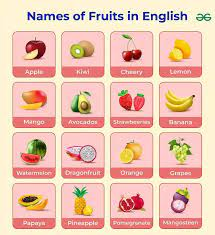
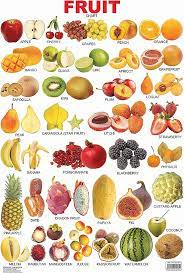
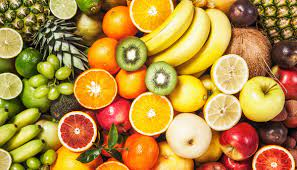
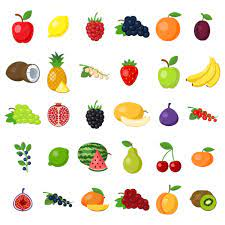
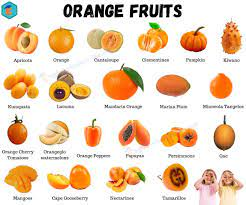
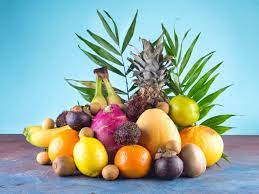
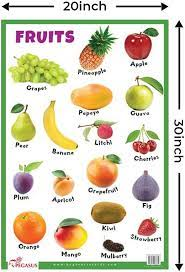
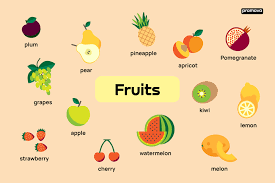
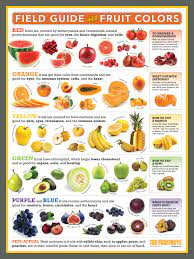
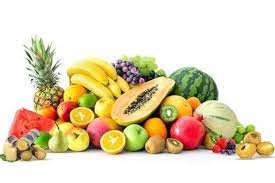

In [89]:
image_elements = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
image_urls = [element.get_attribute('src')for element in image_elements]

print(f"TOP 10 images for '{keyword}':")
for url in image_urls[:10]:
    print(url)

In [93]:
# Creating a pandas dataframe. 
df = pd.DataFrame({})
df["Image Urls"] = image_urls
df["Elements"] = image_elements

In [94]:
df

,Image Urls,Elements
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",<selenium.webdriver.remote.webelement.WebEleme...
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",<selenium.webdriver.remote.webelement.WebEleme...
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",<selenium.webdriver.remote.webelement.WebEleme...
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",<selenium.webdriver.remote.webelement.WebEleme...
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",<selenium.webdriver.remote.webelement.WebEleme...
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",<selenium.webdriver.remote.webelement.WebEleme...
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",<selenium.webdriver.remote.webelement.WebEleme...
7,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",<selenium.webdriver.remote.webelement.WebEleme...
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",<selenium.webdriver.remote.webelement.WebEleme...
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",<selenium.webdriver.remote.webelement.WebEleme...


In [95]:
driver.quit()

4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the
details is missing then replace it by “- “. Save your results in a dataframe and CSV

In [121]:
url = "https://www.flipkart.com/"
driver = webdriver.Chrome()
driver.get(url)

In [122]:
prod_input2 = input("Enter name of the Product here: ")

Enter name of the Product here: Smartphone


In [123]:
search_bar = driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input")
search_bar.send_keys(prod_input2)
search_button = driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button")
search_button.click()

In [124]:
name = []
name_tag = driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
name_tag

[<selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1766")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1835")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1836")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1546")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1837")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1838")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec

In [125]:
for i in name_tag:
    name.append(i.text)
    
name

['MOTOROLA Edge 40 Neo (Caneel Bay, 256 GB)',
 'MOTOROLA Edge 40 Neo (Black Beauty, 256 GB)',
 'MOTOROLA g54 5G (Pearl Blue, 256 GB)',
 'vivo T2x 5G (Aurora Gold, 128 GB)',
 'vivo T2x 5G (Glimmer Black, 128 GB)',
 'vivo T2x 5G (Aurora Gold, 128 GB)',
 'vivo T2x 5G (Marine Blue, 128 GB)',
 'vivo T2x 5G (Glimmer Black, 128 GB)',
 'vivo T2x 5G (Marine Blue, 128 GB)',
 'vivo T2x 5G (Aurora Gold, 128 GB)',
 'vivo T2x 5G (Glimmer Black, 128 GB)',
 'vivo T2x 5G (Marine Blue, 128 GB)',
 'MOTOROLA Edge 40 Neo (Soothing Sea, 256 GB)',
 'MOTOROLA g54 5G (Mint Green, 128 GB)',
 'REDMI 12C (Matte Black, 64 GB)',
 'OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)',
 'POCO C55 (Cool Blue, 128 GB)',
 'MOTOROLA g84 5G (Viva Magneta, 256 GB)',
 'MOTOROLA g54 5G (Mint Green, 256 GB)',
 'POCO C55 (Forest Green, 64 GB)',
 'OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)',
 'POCO C51 (Royal Blue, 64 GB)',
 'realme C51 (Carbon Black, 64 GB)',
 'realme C51 (Mint Green, 64 GB)']

In [129]:
ram = []
ram_tag = driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][1]')
ram_tag

[<selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1542")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1763")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1764")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1874")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1879")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1883")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec

In [130]:
for i in ram_tag:
    ram.append(i.text)
    
ram

['12 GB RAM | 256 GB ROM',
 '12 GB RAM | 256 GB ROM',
 '12 GB RAM | 256 GB ROM | Expandable Upto 1 TB',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '12 GB RAM | 256 GB ROM',
 '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '12 GB RAM | 256 GB ROM',
 '12 GB RAM | 256 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 2 TB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 2 TB']

In [132]:
display = []
display_tag = driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][2]')
display_tag

[<selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1744")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1544")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1870")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1875")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1880")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1884")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec

In [133]:
for i in display_tag:
    display.append(i.text)
    
display

['16.64 cm (6.55 inch) Full HD+ Display',
 '16.64 cm (6.55 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.64 cm (6.55 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) Full HD+ Display',
 '17.04 cm (6.71 inch) HD+ Display',
 '16.74 cm (6.59 inch) Display',
 '17.04 cm (6.71 inch) HD+ Display',
 '16.64 cm (6.55 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) Full HD+ Display',
 '17.04 cm (6.71 inch) HD+ Display',
 '16.74 cm (6.59 inch) Display',
 '16.56 cm (6.52 inch) HD+ Display',
 '17.12 cm (6.74 inch) HD Display',
 '17.12 cm (6.74 inch) HD Display']

In [134]:
camera = []
camera_tag = driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][3]')
camera_tag

[<selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1859")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1765")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1761")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1876")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1563")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1885")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec

In [135]:
for i in camera_tag:
    camera.append(i.text)
camera

['50MP + 13MP | 32MP Front Camera',
 '50MP + 13MP | 32MP Front Camera',
 '50MP (OIS) + 8MP | 16MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 13MP | 32MP Front Camera',
 '50MP (OIS) + 8MP | 16MP Front Camera',
 '50MP Rear Camera | 5MP Front Camera',
 '64MP Rear Camera | 16MP Front Camera',
 '50MP Dual Rear Camera | 5MP Front Camera',
 '50MP (OIS) + 8MP | 16MP Front Camera',
 '50MP (OIS) + 8MP | 16MP Front Camera',
 '50MP Dual Rear Camera | 5MP Front Camera',
 '64MP Rear Camera | 16MP Front Camera',
 '8MP Dual Rear Camera | 5MP Front Camera',
 '50MP + 0.08MP | 5MP Front Camera',
 '50MP + 0.08MP | 5MP Front Camera']

In [136]:
battery = []
battery_tag = driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][4]')
battery_tag

[<selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1541")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1749")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1871")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1877")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1881")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1886")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec

In [137]:
for i in battery_tag:
    battery.append(i.text)
battery

['5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery']

In [139]:
processor = []
processor_tag = driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][5]')
processor_tag

[<selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1750")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1868")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1872")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1547")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1882")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1887")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec

In [140]:
for i in processor_tag:
    processor.append(i.text)
    
processor

['Dimensity 7030 Processor',
 'Dimensity 7030 Processor',
 'Dimensity 7020 Processor',
 'Dimensity 6020 Processor',
 'Dimensity 6020 Processor',
 'Dimensity 6020 Processor',
 'Dimensity 6020 Processor',
 'Dimensity 6020 Processor',
 'Dimensity 6020 Processor',
 'Dimensity 6020 Processor',
 'Dimensity 6020 Processor',
 'Dimensity 6020 Processor',
 'Dimensity 7030 Processor',
 'Dimensity 7020 Processor',
 'Helio G85 Processor',
 '12 Months',
 'Mediatek Helio G85 Processor',
 'Snapdragon 695 Processor',
 'Dimensity 7020 Processor',
 'Mediatek Helio G85 Processor',
 '12 months',
 'Helio G36 Processor',
 'T612 Processor',
 'T612 Processor']

In [141]:
warranty = []
warr_tag = driver.find_elements(By.XPATH,'//li[@class="rgWa7D"][6]')
warr_tag

[<selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1752")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1869")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1873")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1878")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1549")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1552")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec

In [142]:
for i in warr_tag:
    warranty.append(i.text)
    
warranty

['1 Year on Handset and 6 Months on Accessories',
 '1 Year on Handset and 6 Months on Accessories',
 '1 Year on Handset and 6 Months on Accessories',
 '1 Year of Device & 6 Months for Inbox Accessories',
 '1 Year of Device & 6 Months for Inbox Accessories',
 '1 Year of Device & 6 Months for Inbox Accessories',
 '1 Year of Device & 6 Months for Inbox Accessories',
 '1 Year of Device & 6 Months for Inbox Accessories',
 '1 Year of Device & 6 Months for Inbox Accessories',
 '1 Year of Device & 6 Months for Inbox Accessories',
 '1 Year of Device & 6 Months for Inbox Accessories',
 '1 Year of Device & 6 Months for Inbox Accessories',
 '1 Year on Handset and 6 Months on Accessories',
 '1 Year on Handset and 6 Months on Accessories',
 '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In the Box Accessories',
 '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In the Box Accessories',
 '1 Year on Handset and 6 Months on Accessories',
 '1 Year on Handset and 6 Mont

In [143]:
reviews = []
rev_tag = driver.find_elements(By.XPATH,'//span[@class="_2_R_DZ"]')
rev_tag

[<selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1989")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1996")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1997")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1998")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_1999")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec0b6b7c6fa6155db9", element="B0F0051307F1728CF1FFA09E83695057_element_2000")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9835bcf37b575bec

In [144]:
for i in rev_tag:
    reviews.append(i.text)
    
reviews

['21,483 Ratings & 3,248 Reviews',
 '21,483 Ratings & 3,248 Reviews',
 '37,176 Ratings & 3,316 Reviews',
 '52,148 Ratings & 3,067 Reviews',
 '52,148 Ratings & 3,067 Reviews',
 '2,64,866 Ratings & 14,496 Reviews',
 '2,64,866 Ratings & 14,496 Reviews',
 '2,64,866 Ratings & 14,496 Reviews',
 '52,148 Ratings & 3,067 Reviews',
 '1,34,248 Ratings & 7,134 Reviews',
 '1,34,248 Ratings & 7,134 Reviews',
 '1,34,248 Ratings & 7,134 Reviews',
 '21,483 Ratings & 3,248 Reviews',
 '27,038 Ratings & 2,687 Reviews',
 '13,966 Ratings & 803 Reviews',
 '1,39,204 Ratings & 9,656 Reviews',
 '91,751 Ratings & 5,479 Reviews',
 '22,367 Ratings & 2,368 Reviews',
 '37,176 Ratings & 3,316 Reviews',
 '80,605 Ratings & 4,936 Reviews',
 '1,39,204 Ratings & 9,656 Reviews',
 '1,39,636 Ratings & 7,766 Reviews',
 '50,964 Ratings & 2,253 Reviews',
 '50,964 Ratings & 2,253 Reviews']

In [148]:
print(len(name),len(ram),len(display),len(camera),len(battery),len(processor),len(warranty),len(reviews))

24 24 24 24 24 24 22 24


In [149]:
df_flipkart =pd.DataFrame({})
df_flipkart["Brand/Name of the Product"] = name[:22]
df_flipkart["Ram"] = ram[:22]
df_flipkart["Display"] = display[:22]
df_flipkart["Camera"] = camera[:22]
df_flipkart["Battery"] = battery[:22]
df_flipkart["Processor"] = processor[:22]
df_flipkart["Warranty"] = warranty[:22]
df_flipkart["Reviews"] = reviews[:22]

In [150]:
df_flipkart

,Brand/Name of the Product,Ram,Display,Camera,Battery,Processor,Warranty,Reviews
0,"MOTOROLA Edge 40 Neo (Caneel Bay, 256 GB)",12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Full HD+ Display,50MP + 13MP | 32MP Front Camera,5000 mAh Battery,Dimensity 7030 Processor,1 Year on Handset and 6 Months on Accessories,"21,483 Ratings & 3,248 Reviews"
1,"MOTOROLA Edge 40 Neo (Black Beauty, 256 GB)",12 GB RAM | 256 GB ROM,16.64 cm (6.55 inch) Full HD+ Display,50MP + 13MP | 32MP Front Camera,5000 mAh Battery,Dimensity 7030 Processor,1 Year on Handset and 6 Months on Accessories,"21,483 Ratings & 3,248 Reviews"
2,"MOTOROLA g54 5G (Pearl Blue, 256 GB)",12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,16.51 cm (6.5 inch) Full HD+ Display,50MP (OIS) + 8MP | 16MP Front Camera,6000 mAh Battery,Dimensity 7020 Processor,1 Year on Handset and 6 Months on Accessories,"37,176 Ratings & 3,316 Reviews"
3,"vivo T2x 5G (Aurora Gold, 128 GB)",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,"52,148 Ratings & 3,067 Reviews"
4,"vivo T2x 5G (Glimmer Black, 128 GB)",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,"52,148 Ratings & 3,067 Reviews"
5,"vivo T2x 5G (Aurora Gold, 128 GB)",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,"2,64,866 Ratings & 14,496 Reviews"
6,"vivo T2x 5G (Marine Blue, 128 GB)",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,"2,64,866 Ratings & 14,496 Reviews"
7,"vivo T2x 5G (Glimmer Black, 128 GB)",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,"2,64,866 Ratings & 14,496 Reviews"
8,"vivo T2x 5G (Marine Blue, 128 GB)",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,"52,148 Ratings & 3,067 Reviews"
9,"vivo T2x 5G (Aurora Gold, 128 GB)",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,"1,34,248 Ratings & 7,134 Reviews"


In [151]:
driver.quit()

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [33]:
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import re

In [23]:
url = "https://www.google.com/maps/@28.5419808,77.2060235,15z?entry=ttu"
driver = webdriver.Chrome()
driver.get(url)
sleep(2)

In [25]:
city = input("Please enter city you would like to search on maps: ")
def search_bar():
    place = driver.find_element(By.ID,"searchboxinput")
    place.send_keys(city)
    search_button = driver.find_element(By.ID,"searchbox-searchbutton")
    search_button.click()
    
search_bar()

Please enter city you would like to search on maps: Delhi


In [27]:
def directions():
    sleep(3)
    button = driver.find_element(By.XPATH,'//span[@class="Cw1rxd google-symbols G47vBd"]')
    button.click()
    
directions()

In [29]:
def search_bar2():
    sleep(5)
    place1 = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[2]/div/div[3]/div[1]/div[1]/div[2]/div[1]/div/input")
    place1.send_keys("Himachal Pradesh")
    search_button2 = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[2]/div/div[3]/div[1]/div[1]/div[2]/button[1]")
    search_button2.click()
    
search_bar2()

In [30]:
url = "https://www.google.com/maps/@28.5419808,77.2060235,15z?entry=ttu"
driver = webdriver.Chrome()
driver.get(url)
sleep(2)

In [31]:
city = input("Enter city name here: ")
search = driver.find_element(By.ID,"searchboxinput")
search.send_keys(city)
search_button = driver.find_element(By.ID,"searchbox-searchbutton")
search_button.click()
sleep(3)

Enter city name here: Delhi


In [34]:
try:
    url_string = driver.current_url
    print("URL: ",url_string)
    co_ordinates = re.findall(r'@(.*)data',url_string)
    if len(co_ordinates):
        coordinate_s = co_ordinates[0].split(",")
        latitude = coordinate_s[0]
        longitude = coordinate_s[1]
    print("Latitude = {}, Longitude = {}".format(latitude,longitude))
    
except Exception as e:
    print("Exception Error",str(e))

URL:  https://www.google.com/maps/place/Delhi/@28.6442874,76.7635689,10z/data=!3m1!4b1!4m6!3m5!1s0x390cfd5b347eb62d:0x37205b715389640!8m2!3d28.7040592!4d77.1024902!16zL20vMDlmMDc?entry=ttu
Latitude = 28.6442874, Longitude = 76.7635689


In [35]:
 driver.quit()

6. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [36]:
url = "https://www.digit.in/top-products/best-gaming-laptops-40.html"
driver = webdriver.Chrome()
driver.get(url)
sleep(3)

In [37]:
brand = []
price = []
specification = []

In [40]:
tag1 = driver.find_elements(By.XPATH,'//div[@class="rh_gr_top_middle mb10 colored_rate_bar"]')
tag1

[<selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_529")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_752")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_764")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_777")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_810")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_807")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7

In [41]:
for i in tag1:
    brand.append(i.text)
    
brand

['HP Omen 17-ck2008TX 13th Gen Core i7-13700HX',
 'MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12900HX',
 'Lenovo Legion 5i Pro 12th Gen Core i7-12700H (82RF00E1IN)',
 'ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen Core i9-13980HX',
 'Acer Predator Helios Neo 16 13th Gen Core i7-13700HX (PHN16-71)',
 'ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ-L4136WS)',
 'MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-205IN)']

In [72]:
tag2 = driver.find_elements(By.XPATH,'//div[@class="cegg-no-top-margin cegg-list-logo-title"]')
tag2

[<selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_86")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_1001")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_1002")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_1003")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_1004")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_1005")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a

In [73]:
for i in tag2:
    specification.append(i.text.replace("\n"," "))
    
specification

['Operating System:\nWindows 11 Home',
 'Display Size :\n17.3',
 'Resolution :\n2560 x 1440',
 'Processor :\n13th Gen Intel Core i7-13700HX',
 '',
 '',
 '',
 '',
 'Operating System:\nWindows 11 Home',
 'Display Size :\n16',
 'Resolution :\n2560 x 1600',
 'Processor :\n12th Gen Intel Core i7-12700H',
 '',
 '',
 '',
 '',
 'Operating System:\nWindows 11 Home',
 'Display Size :\n16',
 'Resolution :\n2560 x 1600',
 'Processor :\n13th Gen Intel Core i7-13700HX',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Operating System:\nWindows 11 Home',
 'Display Size :\n17.3',
 'Resolution :\n2560 x 1440',
 'Processor :\n13th Gen Intel Core i7-13700HX',
 '',
 '',
 '',
 '',
 'Operating System:\nWindows 11 Home',
 'Display Size :\n16',
 'Resolution :\n2560 x 1600',
 'Processor :\n12th Gen Intel Core i7-12700H',
 '',
 '',
 '',
 '',
 'Operating System:\nWindows 11 Home',
 'Display Size :\n16',
 'Resolution :\n2560 x 1600',
 'Processor :\n13th Gen Intel Core i7-13700HX',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ''

In [70]:
tag3 = driver.find_elements(By.XPATH,'//div[@class="cegg-price cegg-price-color cegg-price-instock"]')
tag3

[<selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_935")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_992")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_993")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_994")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_995")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7bda8e2c1ac", element="A27ACE1D1039852B21B2C956070D5D26_element_996")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a551fc69a1e779885a78f7

In [71]:
for i in tag3:
    price.append(i.text)
    
price

['Rs. 259,499',
 'Rs. 228,500',
 'Rs. 129,900',
 'Rs. 118,990',
 'Rs. 12,999',
 'Rs. 14,990',
 'Rs. 49,999',
 'Rs. 99,900']

In [76]:
df = pd.DataFrame({})
df["Product"] = brand
df["Specifications"] = specification[:7]
df["Price"] = price[:7]

In [77]:
df

,Product,Specifications,Price
0,HP Omen 17-ck2008TX 13th Gen Core i7-13700HX,Operating System:\nWindows 11 Home,"Rs. 259,499"
1,MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12...,Display Size :\n17.3,"Rs. 228,500"
2,Lenovo Legion 5i Pro 12th Gen Core i7-12700H (...,Resolution :\n2560 x 1440,"Rs. 129,900"
3,ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen...,Processor :\n13th Gen Intel Core i7-13700HX,"Rs. 118,990"
4,Acer Predator Helios Neo 16 13th Gen Core i7-1...,,"Rs. 12,999"
5,ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ...,,"Rs. 14,990"
6,MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-2...,,"Rs. 49,999"


7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [92]:
url = "https://www.forbes.com/billionaires/"
driver = webdriver.Chrome()
driver.get(url)

In [96]:
ranks = driver.find_elements(By.XPATH,'//div[@class="Table_rank___YBhk Table_dataCell__2QCve"]')
ranks

[<selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_77")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_384")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_385")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_386")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_387")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_388")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e

In [97]:
rank = []
for i in ranks:
    rank.append(i.text)
    
rank

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '31',
 '33',
 '34',
 '35',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '41',
 '43',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '65',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '72',
 '74',
 '74',
 '76',
 '77',
 '77',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '84',
 '86',
 '86',
 '88',
 '89',
 '89',
 '89',
 '92',
 '93',
 '94',
 '94',
 '94',
 '97',
 '97',
 '99',
 '100',
 '101',
 '101',
 '103',
 '104',
 '104',
 '106',
 '107',
 '108',
 '108',
 '108',
 '108',
 '112',
 '113',
 '114',
 '115',
 '116',
 '116',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '124',
 '126',
 '127',
 '128',
 '128',
 '130',
 '130',
 '130',
 '133',
 '133',
 '133',
 '136',
 '137',
 '138',
 '13

In [102]:
names = driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][2]')
names

[<selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_85")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_94")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_100")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_106")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_111")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e886633579", element="B1B5F502C895CAF3FBDC24AEF3B3198D_element_600")>,
 <selenium.webdriver.remote.webelement.WebElement (session="68e2933f4ff623b8905654e8

In [103]:
name = []
for i in names:
    name.append(i.text)
name

['Bernard Arnault & family',
 'Elon Musk',
 'Jeff Bezos',
 'Larry Ellison',
 'Warren Buffett',
 'Bill Gates',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Mukesh Ambani',
 'Steve Ballmer',
 'Francoise Bettencourt Meyers & family',
 'Larry Page',
 'Amancio Ortega',
 'Sergey Brin',
 'Zhong Shanshan',
 'Mark Zuckerberg',
 'Charles Koch & family',
 'Julia Koch & family',
 'Jim Walton',
 'Rob Walton & family',
 'Alice Walton',
 'David Thomson & family',
 'Michael Dell',
 'Gautam Adani',
 'Phil Knight & family',
 'Zhang Yiming',
 'Dieter Schwarz',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Giovanni Ferrero',
 'Jacqueline Mars',
 'John Mars',
 'Li Ka-shing',
 'Ma Huateng',
 'Miriam Adelson & family',
 'Ken Griffin',
 'Mark Mateschitz',
 'Robin Zeng',
 'Tadashi Yanai & family',
 'Len Blavatnik',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Gianluigi Aponte',
 'Rafaela Aponte-Diamant',
 'Colin Huang',
 'Reinhold Wuerth & family',
 'Lee Shau Kee',
 'Jeff Yass',
 'Jim Simon

In [104]:
tag2 = driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][3]')
net_worth = []
for i in tag2:
    net_worth.append(i.text)
    
net_worth

['$211 B',
 '$180 B',
 '$114 B',
 '$107 B',
 '$106 B',
 '$104 B',
 '$94.5 B',
 '$93 B',
 '$83.4 B',
 '$80.7 B',
 '$80.5 B',
 '$79.2 B',
 '$77.3 B',
 '$76 B',
 '$68 B',
 '$64.4 B',
 '$59 B',
 '$59 B',
 '$58.8 B',
 '$57.6 B',
 '$56.7 B',
 '$54.4 B',
 '$50.1 B',
 '$47.2 B',
 '$45.1 B',
 '$45 B',
 '$42.9 B',
 '$40.1 B',
 '$39.1 B',
 '$38.9 B',
 '$38.3 B',
 '$38.3 B',
 '$38 B',
 '$35.3 B',
 '$35 B',
 '$35 B',
 '$34.7 B',
 '$33.4 B',
 '$32.6 B',
 '$32.1 B',
 '$31.6 B',
 '$31.6 B',
 '$31.2 B',
 '$31.2 B',
 '$30.2 B',
 '$29.7 B',
 '$29.5 B',
 '$28.5 B',
 '$28.1 B',
 '$27.8 B',
 '$27.4 B',
 '$27 B',
 '$26.7 B',
 '$26.6 B',
 '$25.6 B',
 '$25.5 B',
 '$25.3 B',
 '$25.2 B',
 '$24.6 B',
 '$24.4 B',
 '$24.2 B',
 '$23.7 B',
 '$23.5 B',
 '$23.4 B',
 '$23.1 B',
 '$23.1 B',
 '$22.9 B',
 '$22.6 B',
 '$22.4 B',
 '$22.1 B',
 '$22 B',
 '$21.6 B',
 '$21.6 B',
 '$21.2 B',
 '$21.2 B',
 '$21.1 B',
 '$21 B',
 '$21 B',
 '$20.9 B',
 '$20.5 B',
 '$20.2 B',
 '$19.6 B',
 '$19.1 B',
 '$19 B',
 '$19 B',
 '$18.9 B',
 '$1

In [105]:
tag3 = driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][4]')
age = []
for i in tag3:
    age.append(i.text)
    
age

['74',
 '51',
 '59',
 '78',
 '92',
 '67',
 '81',
 '83',
 '65',
 '67',
 '69',
 '50',
 '87',
 '49',
 '68',
 '38',
 '87',
 '60',
 '74',
 '78',
 '73',
 '65',
 '58',
 '60',
 '85',
 '39',
 '83',
 '86',
 '85',
 '58',
 '83',
 '87',
 '94',
 '51',
 '77',
 '54',
 '30',
 '54',
 '74',
 '65',
 '74',
 '72',
 '82',
 '78',
 '43',
 '87',
 '95',
 '64',
 '84',
 '76',
 '60',
 '69',
 '51',
 '69',
 '77',
 '74',
 '78',
 '51',
 '56',
 '52',
 '82',
 '62',
 '58',
 '80',
 '80',
 '83',
 '70',
 '81',
 '65',
 '66',
 '52',
 '61',
 '67',
 '36',
 '52',
 '60',
 '90',
 '77',
 '57',
 '72',
 '84',
 '61',
 '73',
 '59',
 '55',
 '72',
 '57',
 '57',
 '77',
 '65',
 '70',
 '61',
 '72',
 '66',
 '87',
 '73',
 '90',
 '83',
 '92',
 '70',
 '72',
 '55',
 '72',
 '75',
 '67',
 '55',
 '67',
 'N/A',
 'N/A',
 '83',
 '76',
 '67',
 '45',
 '68',
 '56',
 '83',
 '81',
 '78',
 '68',
 '60',
 '59',
 '69',
 '95',
 '55',
 '65',
 '93',
 '67',
 '57',
 '94',
 '78',
 '76',
 '47',
 '80',
 '80',
 '71',
 '60',
 '90',
 '64',
 '75',
 '58',
 '57',
 '50',
 '69

In [109]:
tag4 = driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][5]')
country = []
for i in tag4:
    country.append(i.text)
    
country

['France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Mexico',
 'India',
 'United States',
 'France',
 'United States',
 'Spain',
 'United States',
 'China',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Canada',
 'United States',
 'India',
 'United States',
 'China',
 'Germany',
 'France',
 'Germany',
 'Italy',
 'United States',
 'United States',
 'Hong Kong',
 'China',
 'United States',
 'United States',
 'Austria',
 'Hong Kong',
 'Japan',
 'United States',
 'France',
 'France',
 'Switzerland',
 'Switzerland',
 'China',
 'Germany',
 'Hong Kong',
 'United States',
 'United States',
 'United States',
 'Germany',
 'Australia',
 'China',
 'Mexico',
 'India',
 'Indonesia',
 'United States',
 'Russia',
 'Germany',
 'United States',
 'Indonesia',
 'Russia',
 'China',
 'China',
 'Chile',
 'Indonesia',
 'United Kingdom',
 'India',
 'Japan',
 'Russia',
 'France',
 

In [110]:
tag5 = driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][6]')
source = []
for i in tag5:
    source.append(i.text)
    
source

['LVMH',
 'Tesla, SpaceX',
 'Amazon',
 'Oracle',
 'Berkshire Hathaway',
 'Microsoft',
 'Bloomberg LP',
 'Telecom',
 'Diversified',
 'Microsoft',
 "L'Oréal",
 'Google',
 'Zara',
 'Google',
 'Beverages, pharmaceuticals',
 'Facebook',
 'Koch Industries',
 'Koch Industries',
 'Walmart',
 'Walmart',
 'Walmart',
 'Media',
 'Dell Technologies',
 'Infrastructure, commodities',
 'Nike',
 'TikTok',
 'Retail',
 'Luxury goods',
 'Shipping',
 'Nutella, chocolates',
 'Candy, pet food',
 'Candy, pet food',
 'Diversified',
 'Internet media',
 'Casinos',
 'Hedge funds',
 'Red Bull',
 'Batteries',
 'Fashion retail',
 'Music, chemicals',
 'Chanel',
 'Chanel',
 'Shipping',
 'Shipping',
 'E-commerce',
 'Fasteners',
 'Real estate',
 'Trading, investments',
 'Hedge funds',
 'Investments',
 'BMW, pharmaceuticals',
 'Mining',
 'Online games',
 'Mining',
 'software services',
 'Coal',
 'Discount brokerage',
 'Fertilizers, coal',
 'BMW',
 'Amazon',
 'Banking, tobacco',
 'Metals',
 'E-commerce',
 'Home appliances

In [111]:
tag6 = driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"][7]')
industry = []
for i in tag6:
    industry.append(i.text)
    
industry

['Fashion & Retail',
 'Automotive',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Media & Entertainment',
 'Telecom',
 'Diversified',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Logistics',
 'Food & Beverage',
 'Food & Beverage',
 'Food & Beverage',
 'Diversified',
 'Technology',
 'Gambling & Casinos',
 'Finance & Investments',
 'Food & Beverage',
 'Automotive',
 'Fashion & Retail',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Logistics',
 'Logistics',
 'Technology',
 'Manufacturing',
 'Real Estate',
 'Finance & Investments',
 'Finance & Investments',
 'Finance & Investments',
 'Automotive',
 'Metals & Mining',
 'Technology',
 'Metals & Min

In [113]:
print(len(rank),len(name),len(net_worth),len(age),len(country),len(source),len(industry))

200 200 200 200 200 200 200


In [114]:
df_forbes = pd.DataFrame({})
df_forbes["Rank"] = rank
df_forbes["Name"] = name
df_forbes["Age"] = age
df_forbes["Net Worth"] = net_worth
df_forbes["Country"] = country
df_forbes["Source"] = source
df_forbes["Industry"] = industry

In [115]:
df_forbes

,Rank,Name,Age,Net Worth,Country,Source,Industry
0,1,Bernard Arnault & family,74,$211 B,France,LVMH,Fashion & Retail
1,2,Elon Musk,51,$180 B,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,59,$114 B,United States,Amazon,Technology
3,4,Larry Ellison,78,$107 B,United States,Oracle,Technology
4,5,Warren Buffett,92,$106 B,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,195,Jin Baofang,70,$9.6 B,China,Solar panels,Energy
196,195,Luo Liguo & family,67,$9.6 B,China,Chemicals,Manufacturing
197,195,Marijke Mars,58,$9.6 B,United States,"Candy, pet food",Food & Beverage
198,195,Pamela Mars,62,$9.6 B,United States,"Candy, pet food",Food & Beverage


8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [116]:
# Opening an automated window to browse the url we need to scrape the data.
url = "https://www.youtube.com/watch?v=0kQ8i2FpRDk&t=1s"
driver = webdriver.Chrome()
driver.get(url)
sleep(3)

WebDriverException: Message: no such execution context
  (Session info: chrome=119.0.6045.200)
Stacktrace:
	GetHandleVerifier [0x00007FF61E9082B2+55298]
	(No symbol) [0x00007FF61E875E02]
	(No symbol) [0x00007FF61E73045D]
	(No symbol) [0x00007FF61E71EEDC]
	(No symbol) [0x00007FF61E71D041]
	(No symbol) [0x00007FF61E71D9CE]
	(No symbol) [0x00007FF61E72A94B]
	(No symbol) [0x00007FF61E73B551]
	(No symbol) [0x00007FF61E73FC1A]
	(No symbol) [0x00007FF61E71E032]
	(No symbol) [0x00007FF61E73B1E3]
	(No symbol) [0x00007FF61E7AAB0B]
	(No symbol) [0x00007FF61E791E83]
	(No symbol) [0x00007FF61E76670A]
	(No symbol) [0x00007FF61E767964]
	GetHandleVerifier [0x00007FF61EC80AAB+3694587]
	GetHandleVerifier [0x00007FF61ECD728E+4048862]
	GetHandleVerifier [0x00007FF61ECCF173+4015811]
	GetHandleVerifier [0x00007FF61E9A47D6+695590]
	(No symbol) [0x00007FF61E880CE8]
	(No symbol) [0x00007FF61E87CF34]
	(No symbol) [0x00007FF61E87D062]
	(No symbol) [0x00007FF61E86D3A3]
	BaseThreadInitThunk [0x00007FFF8439257D+29]
	RtlUserThreadStart [0x00007FFF85DCAA58+40]


In [117]:
# Finding the element tag that we need to scrape
tag1 = driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]')
tag1

[<selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_6159")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_9038")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_9116")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_9138")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_9164")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_9189")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956

In [118]:
# Creating an empty list and using a for loop to scrape the elements.
comments = []
for i in tag1:
    comments.append(i.text)
    
comments

["I so BADLY want this show to be good, please don't pull a Halo on us ",
 'Don’t even play video games; but live for post apocalyptic tv and movies and this looks good. Excited for it. Well done to whoever put together the trailer.',
 'Even if this show ends up being not great (which I hope it isn’t, I’m rooting for the show to be good),  whoever put this trailer together did one hell of a job capturing the tone, setting, and just generally getting my interest in the show to peak. Looking forward to April.',
 "I like how she's scared of the tumbleweed because she's a vault dweller. Little details like this are a good sign. I really hope this turns out well.",
 'Wow, I love everything I see about this so far. The music, the scale, power armor, it all looks so good, even the lead actress almost looks like a character you could create in game. I hope they capture the weirdness and dark humor of the wasteland, this could really be a gem.',
 "I don't have super high hopes for this show, bu

In [119]:
# Finding the element tag that we need to scrape
tag2 = driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
tag2

[<selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_9384")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_6375")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_6379")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_6383")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_9340")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956a1c81bde9fd9d2fc", element="B3B1A16B4B9F2B64E7BE64F5A40A3D26_element_9394")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7a3df514274c7956

In [122]:
# Creating an empty list and using a for loop to scrape the elements.
comn_time = []
for i in tag2:
    comn_time.append(i.text)
    
comn_time[4:]

['5 days ago',
 '1 day ago',
 '1 day ago',
 '1 day ago',
 '1 day ago',
 '1 day ago',
 '3 days ago (edited)',
 '1 day ago',
 '1 day ago',
 '1 day ago',
 '1 day ago',
 '19 hours ago',
 '4 days ago',
 '1:46',
 '18 hours ago',
 '1 day ago',
 '7 hours ago',
 '11 hours ago',
 '14 hours ago',
 '4 days ago',
 '7 hours ago']

In [123]:
# Creating a pandas dataframe
df = pd.DataFrame({})
df["Comment"] = comments
df["Time of Comment"] = comn_time[4:]

In [124]:
df

,Comment,Time of Comment
0,"I so BADLY want this show to be good, please d...",5 days ago
1,Don’t even play video games; but live for post...,1 day ago
2,Even if this show ends up being not great (whi...,1 day ago
3,I like how she's scared of the tumbleweed beca...,1 day ago
4,"Wow, I love everything I see about this so far...",1 day ago
5,"I don't have super high hopes for this show, b...",1 day ago
6,I really hope that Lucy is likeable and is all...,3 days ago (edited)
7,I was afraid the monsters were gonna look corn...,1 day ago
8,This looks SO good. I’m optimistic about it be...,1 day ago
9,"Я буду очень жать этот сериал, больше всего, и...",1 day ago


In [125]:
driver.quit()

9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [126]:
url = "https://www.hostelworld.com/"
driver = webdriver.Chrome()
driver.get(url)

In [127]:
# Finding the element tag that we need to scrape
tag1 = driver.find_elements(By.XPATH,'//div[@class="property-name"]')
tag1

[<selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_181")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_208")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_283")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_371")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_455")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_535")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c92

In [128]:
# Creating an empty list and using a for loop to scrape the elements.
name = []
for i in tag1:
    name.append(i.text)
    
name

["Wombat's City Hostel London",
 "St Christopher's Village",
 "Wombat's City Hostel London",
 "St Christopher's Village",
 'Onefam Notting Hill',
 'Urbany Hostel London',
 'Generator London',
 'Safestay London Elephant & Castle',
 'NX London Hostel',
 'No.8 Willesden Hostel London',
 "St Christopher's Hammersmith",
 'Kabannas London St Pancras',
 'Saint James Backpackers',
 "St Christopher's Inn - London Bridge",
 "St Christopher's Camden",
 'International Students House',
 "St Christopher's Shepherds Bush",
 "St Christopher's Oasis-Female Only",
 'Bell House Hostel',
 'Paramount Hotel',
 'Zedwell Piccadilly Circus',
 'Kip Hotel',
 'All Star Private Studios',
 'Britannia Inn Hotel',
 'Hanover Hotel']

In [136]:
# Finding the element tag that we need to scrape
tag2 = driver.find_elements(By.XPATH,'//div[@class="rating-score"]')
tag2

[<selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_191")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_218")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_293")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_381")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_465")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_545")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c92

In [138]:
# Creating an empty list and using a for loop to scrape the elements.
ratings = []
for i in tag2:
    ratings.append(i.text.replace("\n"," "))
    
ratings

['9.0 Superb',
 '8.1 Fabulous',
 '9.0 Superb',
 '8.1 Fabulous',
 '9.6 Superb',
 '9.5 Superb',
 '7.6 Very Good',
 '7.2 Very Good',
 '8.5 Fabulous',
 '7.1 Very Good',
 '7.6 Very Good',
 '8.3 Fabulous',
 '7.5 Very Good',
 '7.3 Very Good',
 '7.5 Very Good',
 '8.7 Fabulous',
 '7.4 Very Good',
 '8.0 Fabulous',
 '7.1 Very Good',
 '6.5 Good',
 '6.1 Good',
 '4.6',
 '5.6',
 '8.3 Fabulous']

In [131]:
# Finding the element tag that we need to scrape
tag3 = driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
tag3

[<selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_303")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_391")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_475")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_555")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_635")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_718")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c92

In [133]:
# Creating an empty list and using a for loop to scrape the elements.
distance = []
for i in tag3:
    distance.append(i.text.replace("-"," "))
    
distance

['  3.6km from city centre',
 '  1.8km from city centre',
 '  5.5km from city centre',
 '  5.4km from city centre',
 '  3km from city centre',
 '  1.7km from city centre',
 '  6.1km from city centre',
 '  10km from city centre',
 '  7.5km from city centre',
 '  3.3km from city centre',
 '  5.5km from city centre',
 '  1.8km from city centre',
 '  4.3km from city centre',
 '  3.3km from city centre',
 '  7km from city centre',
 '  1.8km from city centre',
 '  4.2km from city centre',
 '  5.7km from city centre',
 '  1.6km from city centre',
 '  6.8km from city centre',
 '  9.1km from city centre',
 '  14.5km from city centre',
 '  2.1km from city centre']

In [134]:
# Finding the element tag that we need to scrape
tag4 = driver.find_elements(By.XPATH,'//span[@class="distance-property-type"]')
tag4

[<selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_301")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_389")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_473")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_553")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_633")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_716")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c92

In [135]:
# Creating an empty list and using a for loop to scrape the elements.
t_o_p = []
for i in tag4:
    t_o_p.append(i.text)
    
t_o_p

['Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hostel',
 'Hotel',
 'Hotel',
 'Hotel',
 'Apartment',
 'Hotel',
 'Hotel']

In [139]:
# Finding the element tag that we need to scrape
tag5 = driver.find_elements(By.XPATH,'//div[@class="review"]')
tag5

[<selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_296")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_384")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_468")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_548")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_628")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_711")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c92

In [145]:
# Creating an empty list and using a for loop to scrape the elements.
review = []
for i in tag5:
    review.append(i.text.replace("("," ").replace(")"," "))
    
review

[' 15643 ',
 ' 12717 ',
 ' 2451 ',
 ' 1056 ',
 ' 7972 ',
 ' 5228 ',
 ' 2057 ',
 ' 5160 ',
 ' 4361 ',
 ' 2953 ',
 ' 1947 ',
 ' 3573 ',
 ' 4110 ',
 ' 1089 ',
 ' 816 ',
 ' 795 ',
 ' 119 ',
 ' 42 ',
 ' 2 ',
 ' 56 ',
 ' 153 ',
 ' 23 ']

In [158]:
# Finding the element tag that we need to scrape
tag6 = driver.find_elements(By.XPATH,'//div[@class="property-accommodations"]')
tag6

[<selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_200")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_227")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_339")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_420")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_499")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c9242c0aaff57", element="87D86862FC8288BBE2637963B348226D_element_579")>,
 <selenium.webdriver.remote.webelement.WebElement (session="923740d05d1b95dfd60c92

In [160]:
# Creating an empty list and using a for loop to scrape the elements.
price1 = []
for i in tag6:
    price1.append(i.text.replace("\n"," "))
    
price1

['From ₹4,596',
 'From ₹3,523',
 '-25% Privates From ₹36,771 ₹27,578 -25% Dorms From ₹6,128 ₹4,596',
 'No Privates Available -10% Dorms From ₹3,914 ₹3,523',
 'Privates From ₹17,905 No Dorms Available',
 'No Privates Available Dorms From ₹7,237',
 'Privates From ₹23,237 Dorms From ₹4,871',
 'No Privates Available Dorms From ₹3,086',
 'No Privates Available Dorms From ₹7,887',
 'No Privates Available Dorms From ₹1,637',
 'No Privates Available -10% Dorms From ₹4,061 ₹3,655',
 'No Privates Available Dorms From ₹6,272',
 '-10% Privates From ₹15,969 ₹14,372 -10% Dorms From ₹5,835 ₹5,252',
 'No Privates Available -10% Dorms From ₹4,526 ₹4,074',
 'No Privates Available -10% Dorms From ₹4,216 ₹3,794',
 'Privates From ₹14,606 No Dorms Available',
 'No Privates Available -10% Dorms From ₹3,674 ₹3,306',
 'No Privates Available -10% Dorms From ₹4,410 ₹3,969',
 'No Privates Available Dorms From ₹3,837',
 'Privates From ₹9,784 No Dorms Available',
 'Privates From ₹45,725 No Dorms Available',
 'Priva

In [161]:
print(len(name),len(ratings),len(distance),len(t_o_p),len(review),len(price1))

25 24 23 23 22 25


In [164]:
# Creating a pandas dataframe.
df = pd.DataFrame({})
df["Name of property"] = name[:22]
df["Ratings"] = ratings[:22]
df["Reviews"] = review[:22]
df["Distance"] = distance[:22]
df["Type of Property"] = t_o_p[:22]
df["Price "] = price1[:22]

In [165]:
df

,Name of property,Ratings,Reviews,Distance,Type of Property,Price
0,Wombat's City Hostel London,9.0 Superb,15643,3.6km from city centre,Hostel,"From ₹4,596"
1,St Christopher's Village,8.1 Fabulous,12717,1.8km from city centre,Hostel,"From ₹3,523"
2,Wombat's City Hostel London,9.0 Superb,2451,5.5km from city centre,Hostel,"-25% Privates From ₹36,771 ₹27,578 -25% Dorms ..."
3,St Christopher's Village,8.1 Fabulous,1056,5.4km from city centre,Hostel,"No Privates Available -10% Dorms From ₹3,914 ₹..."
4,Onefam Notting Hill,9.6 Superb,7972,3km from city centre,Hostel,"Privates From ₹17,905 No Dorms Available"
5,Urbany Hostel London,9.5 Superb,5228,1.7km from city centre,Hostel,"No Privates Available Dorms From ₹7,237"
6,Generator London,7.6 Very Good,2057,6.1km from city centre,Hostel,"Privates From ₹23,237 Dorms From ₹4,871"
7,Safestay London Elephant & Castle,7.2 Very Good,5160,10km from city centre,Hostel,"No Privates Available Dorms From ₹3,086"
8,NX London Hostel,8.5 Fabulous,4361,7.5km from city centre,Hostel,"No Privates Available Dorms From ₹7,887"
9,No.8 Willesden Hostel London,7.1 Very Good,2953,3.3km from city centre,Hostel,"No Privates Available Dorms From ₹1,637"


In [166]:
driver.quit()